In [18]:
import numpy as np
from ripser import Rips
import matplotlib.pyplot as plt
from get_hdmatrices import TARG

## Data Preprocessing

In [19]:
targ = TARG(samples=100, simulations=1, groups=1, segsites=1000, maxdim=2)

# File Processing
# (SIMULATIONS, SAMPLES)
group = targ.get_sample_sequences("sim_073024.txt")

# Hamming Distance Matrix Computation
# (SIMULATIONS, SAMPLES, SAMPLES)
hdmatrices = targ.get_hdmatrices(group)

# Add Stochasticity Computation
# (VARLIST, SIMULATIONS, SAMPLES, SAMPLES)
varlist = targ.add_stochasticity(hdmatrices)

## Topological Quantities


### Persistence Diagram

Homologies      contains a list of three entries
                each entry is a record of birth and death times
                of each homology group ($H_0, H_1, H_2$)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=True, n_perm = None, verbose=True)


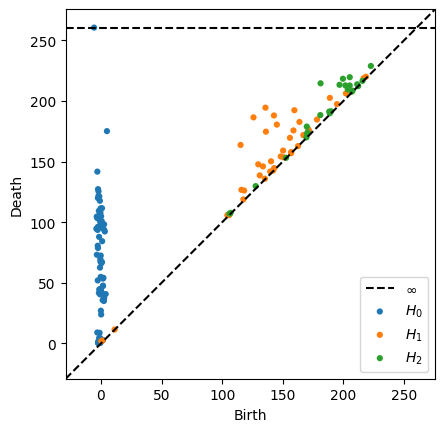

In [36]:
rips = Rips(maxdim=targ.MAXDIM, do_cocycles=True)

# Show the persistence diagram
homologies = rips.fit_transform(varlist[20][0], distance_matrix=True)
rips.plot(homologies, show=True)

In [37]:
# Compute Betti Numbers
betti_numbers = targ.get_betti_numbers(homologies)

# Compute Barcode Lengths
barcode_lens = targ.get_barcode_lengths(homologies)

# Compute Barcode Means and Variances
barcode_means, barcode_vars = targ.get_barcode_length_statistics(homologies)

c:\AnacondaDestination\envs\targ\Lib\site-packages\numpy\_core\_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


### Barcode Ensemble Diagrams

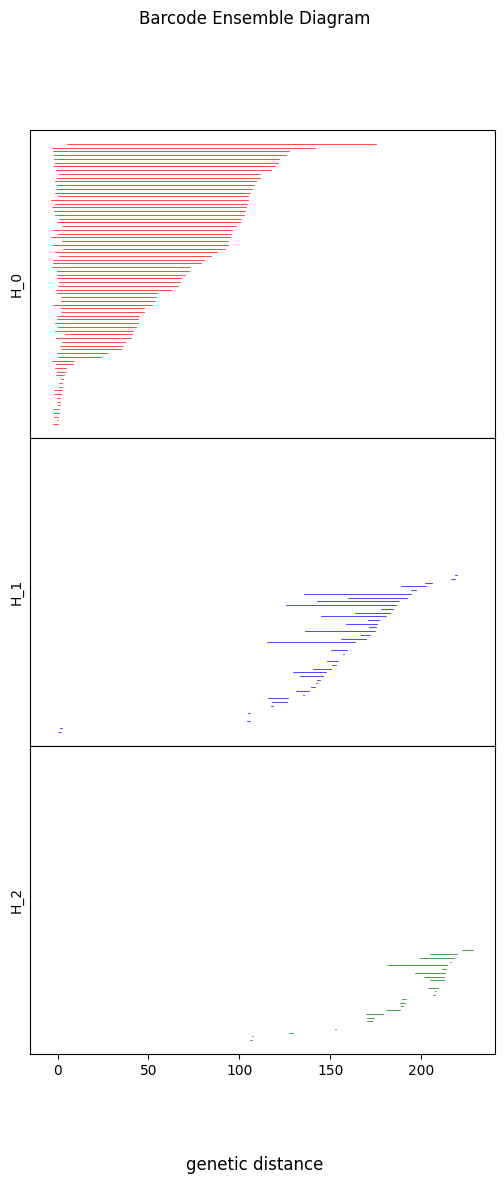

In [35]:
fig = plt.figure(figsize=(6,12))
gs = fig.add_gridspec(nrows=3,hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle("Barcode Ensemble Diagram")

colors=['r', 'b', 'g']
labels=[r'H_1', r'H_1', r'H_2']

for i in range(0, betti_numbers.shape[0]):
    axs[i].set_ylabel(f"H_{i}")
    axs[i].get_yaxis().set_ticks([])
    axs[i].label_outer()

    len_h = round(betti_numbers[i])
    for j in range(0, len_h):
        axs[i].plot(np.linspace(homologies[i][j][0], homologies[i][j][1], 2), [j, j], c=colors[i], linewidth=0.5)
    

fig.supxlabel("genetic distance")
plt.show()

In [ ]:
# Generate plot for Betti numbers of different variances
fig, ax = plt.subplot()
bottom = np.zeros(21)

# Create Stacked Bar Plot
# species = (
#     "Adelie\n $\\mu=$3700.66g",
#     "Chinstrap\n $\\mu=$3733.09g",
#     "Gentoo\n $\\mu=5076.02g$",
# )
# weight_counts = {
#     "Below": np.array([70, 31, 58]),
#     "Above": np.array([82, 37, 66]),
# }
# width = 0.3

# fig, ax = plt.subplots()
# bottom = np.zeros(3)

# for boolean, weight_count in weight_counts.items():
#     print(bottom)
#     p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
#     bottom += weight_count

# ax.set_title("Number of penguins with above average body mass")
# ax.legend(loc="upper right")

# plt.show()